[PMID: 29622724](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6188645/)

[GSE107585](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE107585)

> Single cell RNA sequencing for 57,979 cells from 7 healthy mouse kidneys

|||
|:-|:-|
|Endo|含有Henle的内皮，血管和降环|
|Podo|足细胞|
|PT|近端小管|
|LOH|Henle的升环|
|DCT|远端卷曲小管|
|CD-PC|集合管主细胞|
|CD-IC|CD插层细胞|
|CD-TRANS|CD过渡细胞|
|Fib|成纤维细胞|
|Novel1,Novel2|新细胞1,2|
|Macro|巨噬细胞|
|Neutro|中性粒细胞|
|NK|自然杀伤细胞|
|B lymph,T lymph|T,B细胞|

由`m_kidneys_GSE107585_1_marker`重新注释了免疫细胞

In [1]:
import sys
from pathlib import Path
p_root = Path('/public/workspace/licanchengup/link', 'res_publish')

None if str(p_root) in sys.path else sys.path.append(str(p_root))
print("cd '{}'".format(Path('.').absolute()))

cd '/public/workspace/licanchengup/download/res_publish/run/cache/healthy/m_kidneys_GSE107585'


In [2]:
from func import *

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-20 20:22:56.258212: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



In [3]:
p_temp = p_cache.joinpath('healthy', 'temp_m_kidneys_GSE107585.h5ad')
adata = None
if p_temp.exists():
    adata = sc.read_h5ad(p_temp)
else:
    adata = pd.read_csv(
        'GSE107585_Mouse_kidney_single_cell_datamatrix.txt.gz',
        index_col=0,
        sep='\t').transpose()
    display(adata.head(2))

    _temp = adata['Cluster_Number']
    adata = adata.drop(columns='Cluster_Number')
    display(adata.head(2))

    adata = sc.AnnData(adata)
    adata.obs['Cluster_Number'] = _temp.astype(str)
    del _temp

    display(adata,
            adata.obs.head(2), adata.obs.shape,
            adata.var.head(2), adata.var.shape)
    map_cell_type = {str(i): ct
                     for (i, ct) in enumerate(
        'Endo,Podo,PT,LOH,DCT,CD-PC,CD-IC,CD-Trans,Novel1,Fib,Marco,Neutro,B lymph,T lymph,NK,Novel2'.split(','))
    }
    adata.obs['pre_cell_type'] = adata.obs['Cluster_Number'].map(
        map_cell_type)

    _temp = adata.X
    display(_temp[_temp > 0][:10])
    del _temp

    display(type(adata.X))
    adata.X = csr_matrix(adata.X)
    display(type(adata.X))

    adata.write_h5ad(p_temp)
    print('[out] {}'.format(p_temp.name))
    
display(adata,
        adata.obs.head(2), 
        adata.obs.shape,
        adata.var.head(2),
        adata.var.shape)
display(
    group_agg(adata.obs,
              'Cluster_Number,pre_cell_type'.split(','),
              {'pre_cell_type':['count']}).query(
        "pre_cell_type_count > 0"
              )
)
display(adata.obs['Cluster_Number'].value_counts(),
       adata.obs['pre_cell_type'].value_counts())

AnnData object with n_obs × n_vars = 43745 × 16272
    obs: 'Cluster_Number', 'pre_cell_type'

,Cluster_Number,pre_cell_type
AAACCTGAGATATGCA-1,3,LOH
AAACCTGGTTGTGGCC-1,5,CD-PC


(43745, 2)

""
Rp1
Sox17


(16272, 0)

/public/workspace/licanchengup/link/res_publish/func.py:1083: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = obs.groupby(groupby_list, dropna=dropna).agg(agg_dict)


,Cluster_Number,pre_cell_type,pre_cell_type_count
13,1,Podo,1001
27,2,PT,78
36,3,LOH,26482
49,4,DCT,1581
62,5,CD-PC,8544
76,6,CD-IC,870
93,7,CD-Trans,1729
115,8,Novel1,110
125,9,Fib,601
142,10,Marco,549


Cluster_Number
3     26482
5      8544
7      1729
4      1581
14     1308
1      1001
6       870
9       601
10      549
15      313
13      235
11      228
8       110
2        78
12       74
16       42
Name: count, dtype: int64

pre_cell_type
LOH         26482
CD-PC        8544
CD-Trans     1729
DCT          1581
NK           1308
Podo         1001
CD-IC         870
Fib           601
Marco         549
Novel2        313
T lymph       235
Neutro        228
Novel1        110
PT             78
B lymph        74
Name: count, dtype: int64

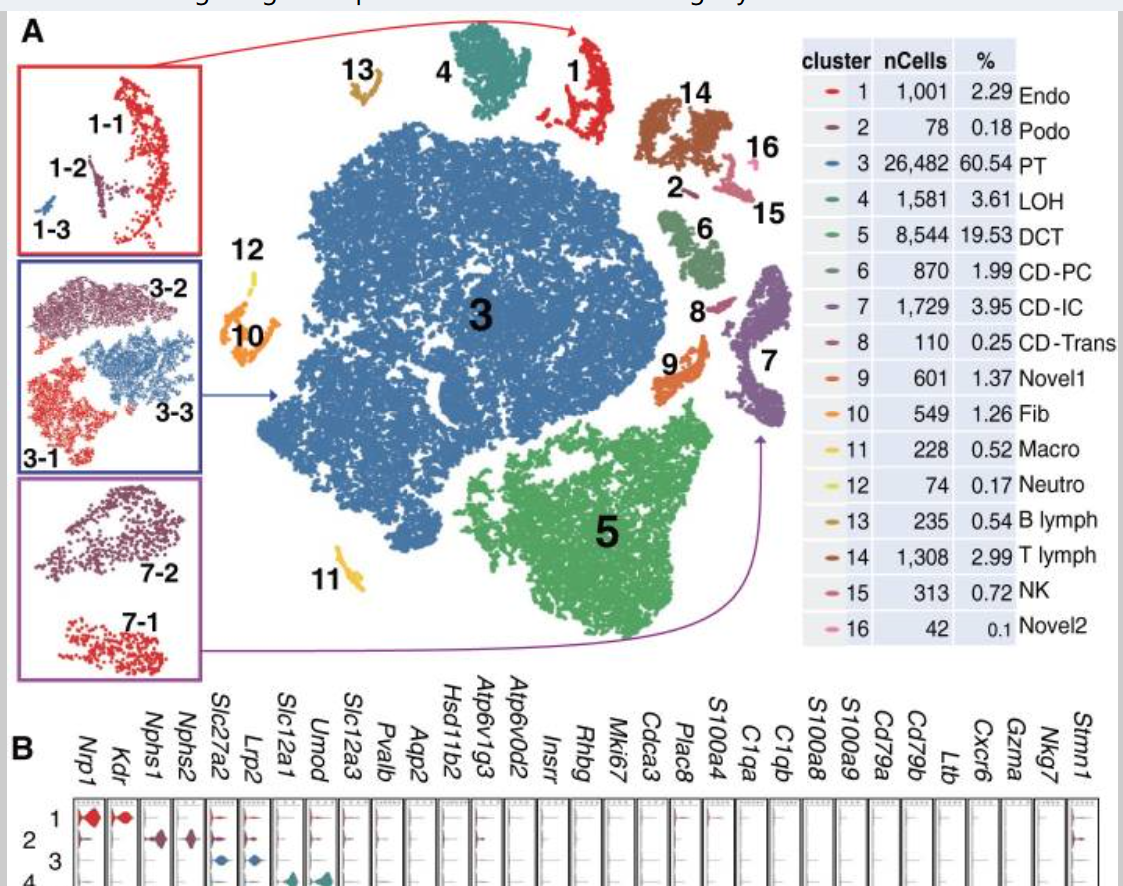

In [4]:
adata.obs['_batch'] = 'lost_7_batches'
adata.obs = adata.obs.join(pd.read_csv('obs_Seurat.csv',index_col=0))
display(adata.obs.head(2))

,Cluster_Number,pre_cell_type,_batch,seurat_clusters,cell_type,UMAP1,UMAP2
AAACCTGAGATATGCA-1,3,LOH,lost_7_batches,1.0,LOH,-1.293267,7.354623
AAACCTGGTTGTGGCC-1,5,CD-PC,lost_7_batches,0.0,CD-PC,3.019838,-7.278323


In [6]:
display(adata,adata.obs.head(2),adata.obs.shape,adata.obs['pre_cell_type'].isna().value_counts())
adata = adata[adata.obs['pre_cell_type'].notna(),:]
display(adata,adata.obs.head(2),adata.obs.shape,adata.obs['pre_cell_type'].isna().value_counts())
adata.obs = adata.obs.loc[:,
    '_batch,cell_type,UMAP1,UMAP2,seurat_clusters,Cluster_Number,pre_cell_type'.split(',')]

View of AnnData object with n_obs × n_vars = 43703 × 16272
    obs: 'Cluster_Number', 'pre_cell_type', '_batch', 'seurat_clusters', 'cell_type', 'UMAP1', 'UMAP2'

,Cluster_Number,pre_cell_type,_batch,seurat_clusters,cell_type,UMAP1,UMAP2
AAACCTGAGATATGCA-1,3,LOH,lost_7_batches,1.0,LOH,-1.293267,7.354623
AAACCTGGTTGTGGCC-1,5,CD-PC,lost_7_batches,0.0,CD-PC,3.019838,-7.278323


(43703, 7)

pre_cell_type
False    43703
Name: count, dtype: int64

View of AnnData object with n_obs × n_vars = 43703 × 16272
    obs: 'Cluster_Number', 'pre_cell_type', '_batch', 'seurat_clusters', 'cell_type', 'UMAP1', 'UMAP2'

,Cluster_Number,pre_cell_type,_batch,seurat_clusters,cell_type,UMAP1,UMAP2
AAACCTGAGATATGCA-1,3,LOH,lost_7_batches,1.0,LOH,-1.293267,7.354623
AAACCTGGTTGTGGCC-1,5,CD-PC,lost_7_batches,0.0,CD-PC,3.019838,-7.278323


(43703, 7)

pre_cell_type
False    43703
Name: count, dtype: int64

In [14]:
h5ad_to_mtx(adata,p_cache.joinpath('healthy/m_kidney'))

frist 10 adata.X nonzero elements:
 [[1 1 2 4 1 4 1 1 3 1]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/healthy/m_kidney


<Axes: >

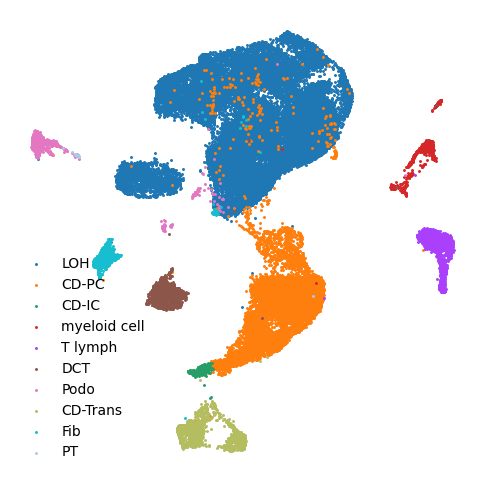

In [13]:
adata.obsm['X_umap'] = adata.obs.loc[:,'UMAP1,UMAP2'.split(',')].to_numpy()
plot_umap(adata,'cell_type',get_color_map(adata.obs['cell_type'].unique()),show_legend=True)

# 走个流程看看

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


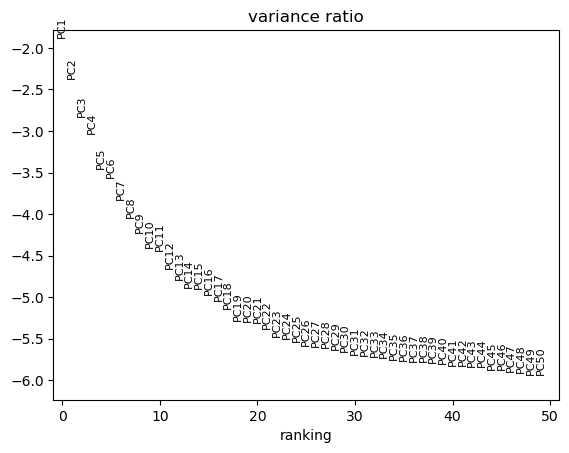

In [15]:
adata
# Saving count data
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


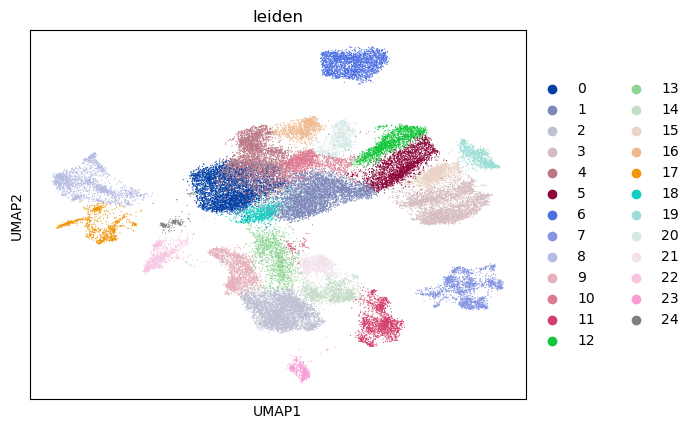

In [16]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
# Using the igraph implementation and a fixed number of iterations can be
# significantly faster, especially for larger datasets
sc.tl.leiden(adata)
sc.pl.umap(adata, color=["leiden"])

> 效果还不错hhhhh

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


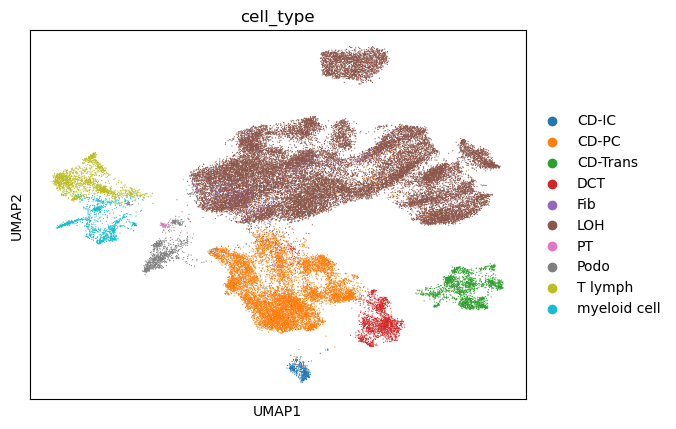

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


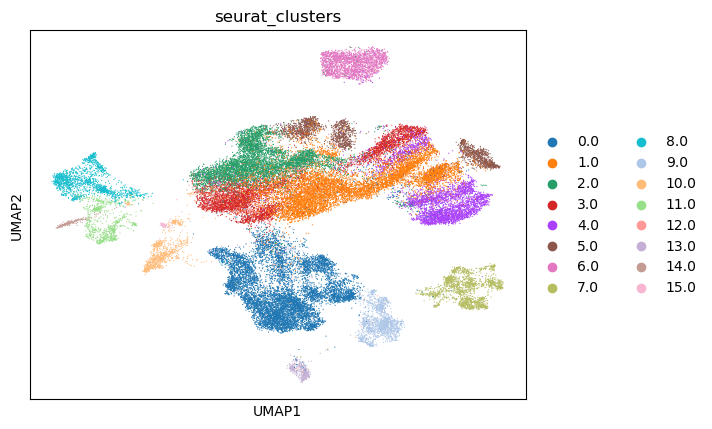

In [22]:
sc.pl.umap(adata,color=['cell_type'])
adata.obs['seurat_clusters'] = adata.obs['seurat_clusters'].astype(str)
sc.pl.umap(adata,color=['seurat_clusters'])

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


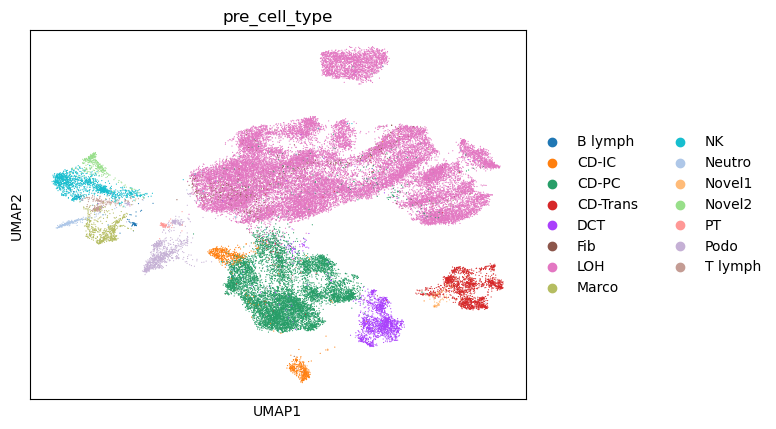

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


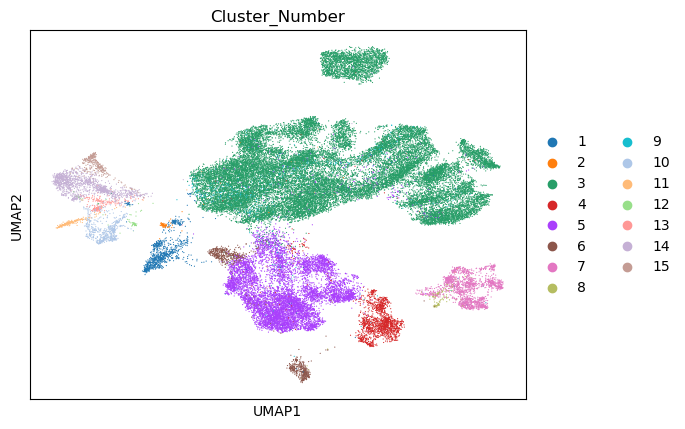

In [17]:
sc.pl.umap(adata,color=['pre_cell_type'])
sc.pl.umap(adata,color=['Cluster_Number'])